In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam


In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.nunique() 

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [8]:
df['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [9]:
#drop the rows with low amount of jobs values
df2 = pd.read_csv('ds_salaries.csv')
job_title_counts = df2['job_title'].value_counts()
mask = df2['job_title'].isin(job_title_counts.index[job_title_counts < 10])
df_filtered = df2[~mask]
df_filtered['job_title'].value_counts()

Data Engineer                               1040
Data Scientist                               840
Data Analyst                                 612
Machine Learning Engineer                    289
Analytics Engineer                           103
Data Architect                               101
Research Scientist                            82
Applied Scientist                             58
Data Science Manager                          58
Research Engineer                             37
ML Engineer                                   34
Data Manager                                  29
Machine Learning Scientist                    26
Data Science Consultant                       24
Data Analytics Manager                        22
Computer Vision Engineer                      18
AI Scientist                                  16
BI Data Analyst                               15
Business Data Analyst                         15
Data Specialist                               14
BI Developer        

In [10]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3552 entries, 1 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3552 non-null   int64 
 1   experience_level    3552 non-null   object
 2   employment_type     3552 non-null   object
 3   job_title           3552 non-null   object
 4   salary              3552 non-null   int64 
 5   salary_currency     3552 non-null   object
 6   salary_in_usd       3552 non-null   int64 
 7   employee_residence  3552 non-null   object
 8   remote_ratio        3552 non-null   int64 
 9   company_location    3552 non-null   object
 10  company_size        3552 non-null   object
dtypes: int64(4), object(7)
memory usage: 333.0+ KB


In [11]:
df_filtered.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3552.00000,3.552000e+03,3552.000000,3552.000000
mean,2022.38964,1.848630e+05,139018.974381,45.523649
std,0.67517,6.586336e+05,62198.328617,48.705652
min,2020.00000,6.000000e+03,5679.000000,0.000000
25%,2022.00000,1.000000e+05,99000.000000,0.000000
50%,2022.00000,1.392500e+05,135000.000000,0.000000
75%,2023.00000,1.800000e+05,177125.000000,100.000000
max,2023.00000,3.040000e+07,450000.000000,100.000000


In [12]:
df_filtered.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [13]:
df_filtered.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L


In [14]:
df_filtered["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [15]:
df_filtered["employment_type"].unique()

array(['CT', 'FT', 'PT', 'FL'], dtype=object)

In [16]:
df = df_filtered.copy()

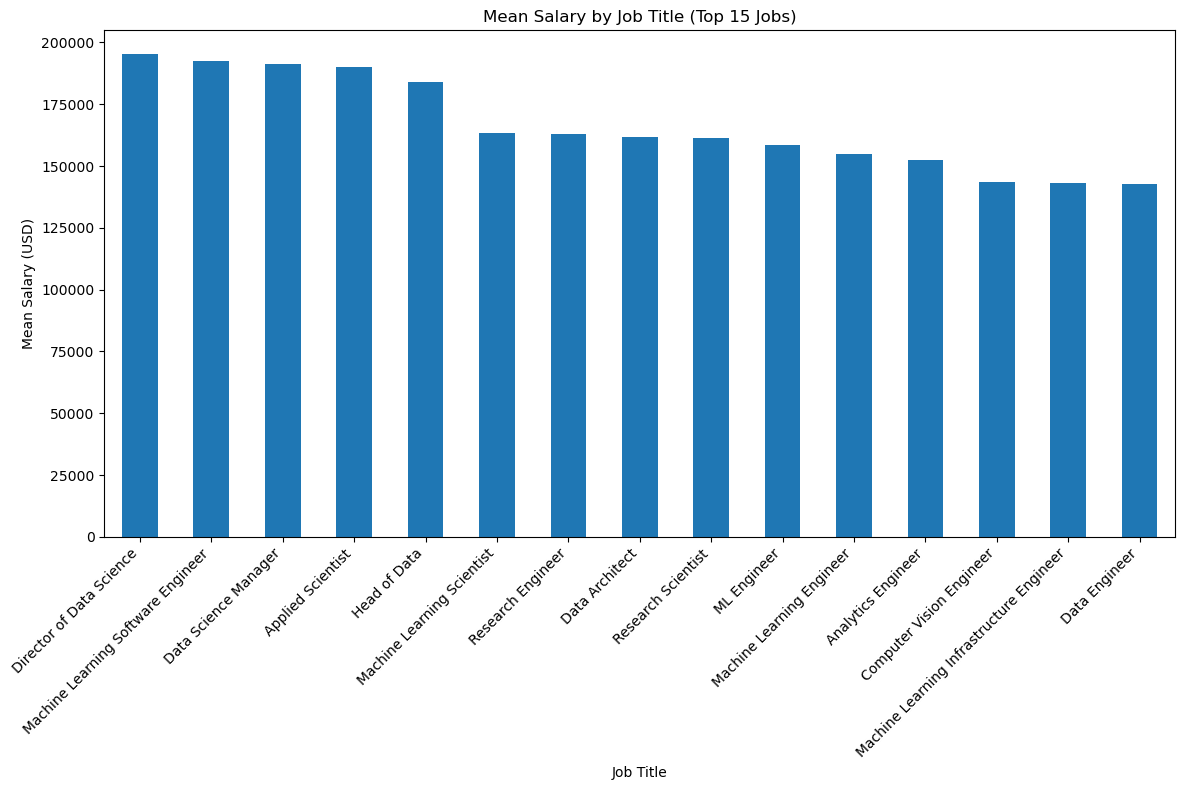

In [17]:
# Group the data by job title and calculate the mean salary
mean_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean()

# Sort the data in descending order by mean salary and select the top 15 job titles
top_15_jobs = mean_salary_by_title.sort_values(ascending=False).head(15)

# Create a wider bar plot to visualize the mean salary by job title for the top 15 jobs
plt.figure(figsize=(12, 8))
top_15_jobs.plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary by Job Title (Top 15 Jobs)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

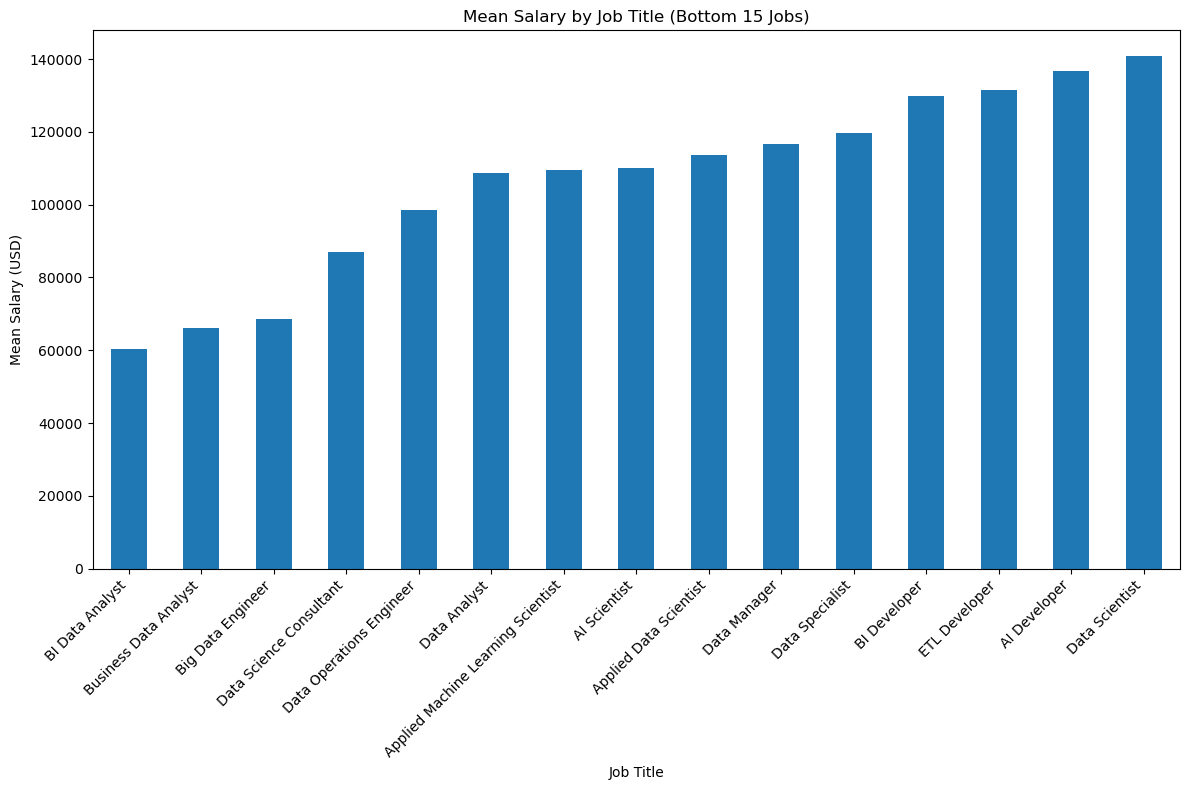

In [18]:
# Group the data by job title and calculate the mean salary
mean_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean()

# Sort the data in descending order by mean salary and select the top 15 job titles
top_15_jobs = mean_salary_by_title.sort_values(ascending=True).head(15)

# Create a wider bar plot to visualize the mean salary by job title for the top 15 jobs
plt.figure(figsize=(12, 8))
top_15_jobs.plot(kind='bar')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary by Job Title (Bottom 15 Jobs)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

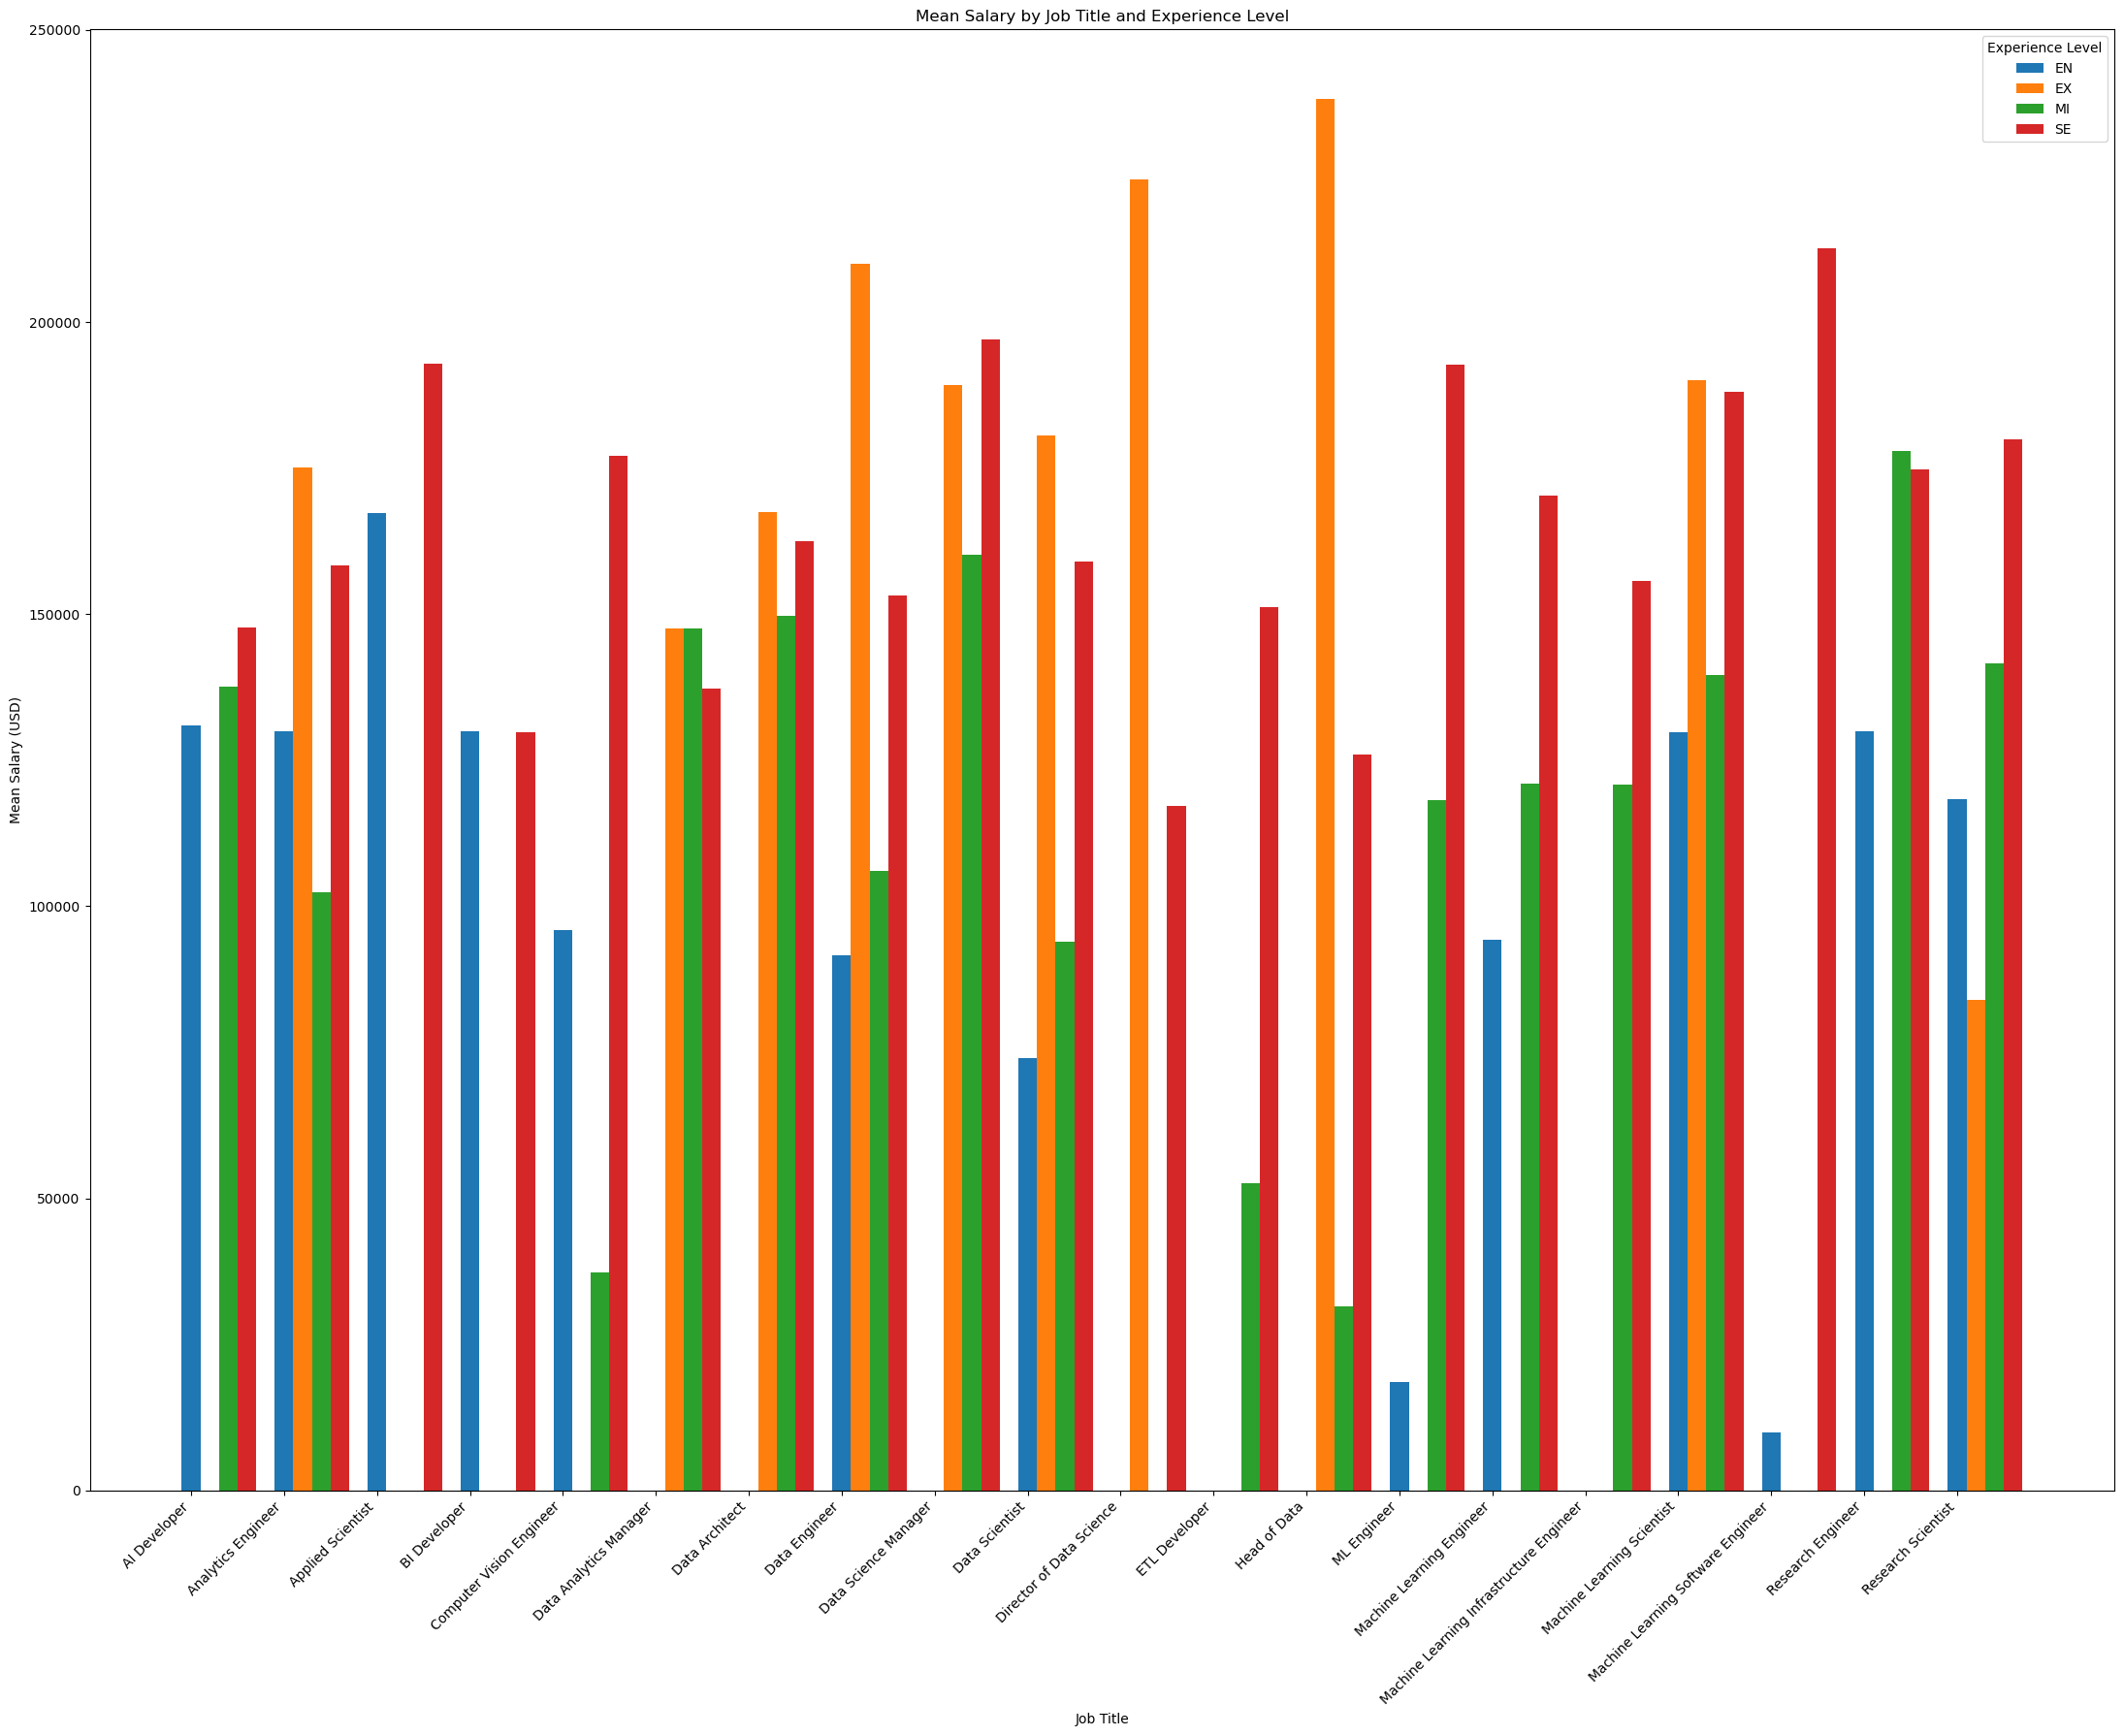

In [19]:
# Group the data by job title and calculate the mean salary
mean_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean()

# Sort the data in descending order by mean salary and select the top 20 job titles
top_20_jobs = mean_salary_by_title.sort_values(ascending=False).head(20)

# Filter the original DataFrame to include only the top 20 job titles
df_filtered = df[df['job_title'].isin(top_20_jobs.index)]

# Group the filtered data by job title and experience level, and calculate the mean salary
mean_salary_by_title_exp = df_filtered.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean()

# Reset the index to flatten the grouped DataFrame
mean_salary_by_title_exp = mean_salary_by_title_exp.reset_index()

# Pivot the data to create separate columns for each experience level
pivot_data = mean_salary_by_title_exp.pivot(index='job_title', columns='experience_level', values='salary_in_usd')

# Set the width of each bar
total_bars = len(pivot_data)
bar_width = 0.8 / len(pivot_data.columns)  # Adjust the width of each bar

# Get the job titles and experience levels
job_titles = pivot_data.index
experience_levels = pivot_data.columns

# Set the positions of the bars on the x-axis
x = np.arange(len(job_titles))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(22, 18))

# Create a grouped bar plot for each experience level
for i, exp_level in enumerate(experience_levels):
    salary_values = pivot_data[exp_level]
    ax.bar(x + i * bar_width, salary_values, bar_width, label=exp_level)

# Set the x-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(job_titles, rotation=45, ha='right')

# Set labels and title
ax.set_xlabel('Job Title')
ax.set_ylabel('Mean Salary (USD)')
ax.set_title('Mean Salary by Job Title and Experience Level')

# Add a legend
ax.legend(experience_levels, title='Experience Level')

# Display the plot
plt.tight_layout()
plt.show()

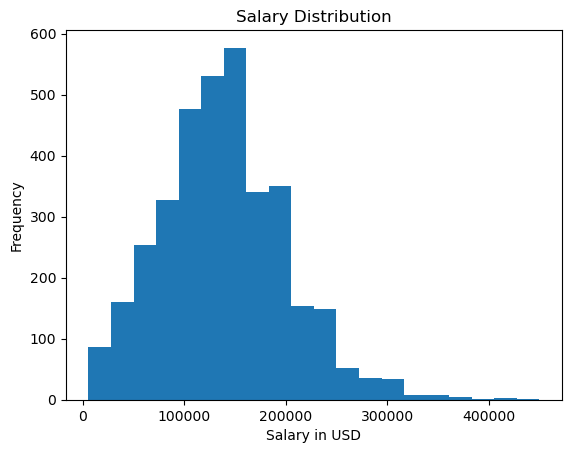

In [20]:
plt.hist(df['salary_in_usd'], bins=20)
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

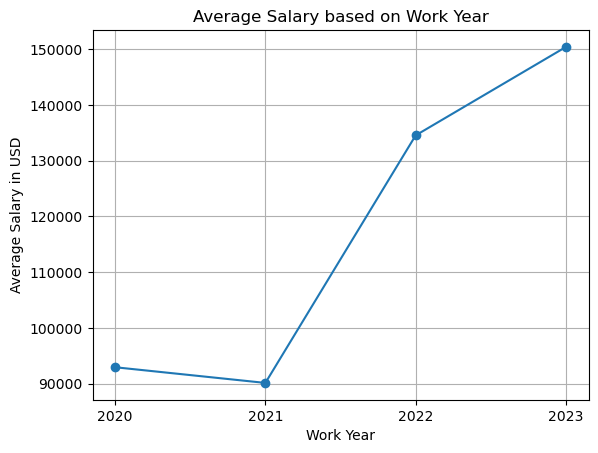

In [21]:
# Filter the data for the four unique work years
work_years = [2020, 2021, 2022, 2023]
filtered_data = df[df['work_year'].isin(work_years)]

# Group the data by work year and calculate the average salary
average_salary = filtered_data.groupby('work_year')['salary_in_usd'].mean()

# Plot the graph
plt.plot(average_salary.index, average_salary.values, marker='o')
plt.xlabel('Work Year')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary based on Work Year')
plt.xticks(average_salary.index)
plt.grid(True)
plt.show()

In [22]:
#models to add somehow
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Transform data using LabelEncoder
cols = ['experience_level', 'employment_type', 'job_title','salary_currency','employee_residence','company_location','company_size']
df_filtered[cols]=df_filtered[cols].apply(LabelEncoder().fit_transform)

# Create X, y
X = df_filtered.drop(["salary_in_usd"], axis=1)
y = df_filtered["salary_in_usd"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2784 entries, 1 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           2784 non-null   int64
 1   experience_level    2784 non-null   int32
 2   employment_type     2784 non-null   int32
 3   job_title           2784 non-null   int32
 4   salary              2784 non-null   int64
 5   salary_currency     2784 non-null   int32
 6   salary_in_usd       2784 non-null   int64
 7   employee_residence  2784 non-null   int32
 8   remote_ratio        2784 non-null   int64
 9   company_location    2784 non-null   int32
 10  company_size        2784 non-null   int32
dtypes: int32(7), int64(4)
memory usage: 184.9 KB


In [23]:
# Set seed
import tensorflow as tf
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1),
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
70/70 [==============================] - 9s 2ms/step - loss: 134494.8438 - mae: 134494.8438
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 87108.9531 - mae: 87108.9531
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 46818.5703 - mae: 46818.5703
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 46506.3164 - mae: 46506.3164
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 46099.3281 - mae: 46099.3281
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 45987.5898 - mae: 45987.5898
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 45967.1875 - mae: 45967.1875
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 46227.9297 - mae: 46227.9297
Epoch 9/100
70/70 [==============================] - 0s 2ms/step - loss: 46259.7305 - mae: 46259.7305
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss: 45835.

<AxesSubplot:>

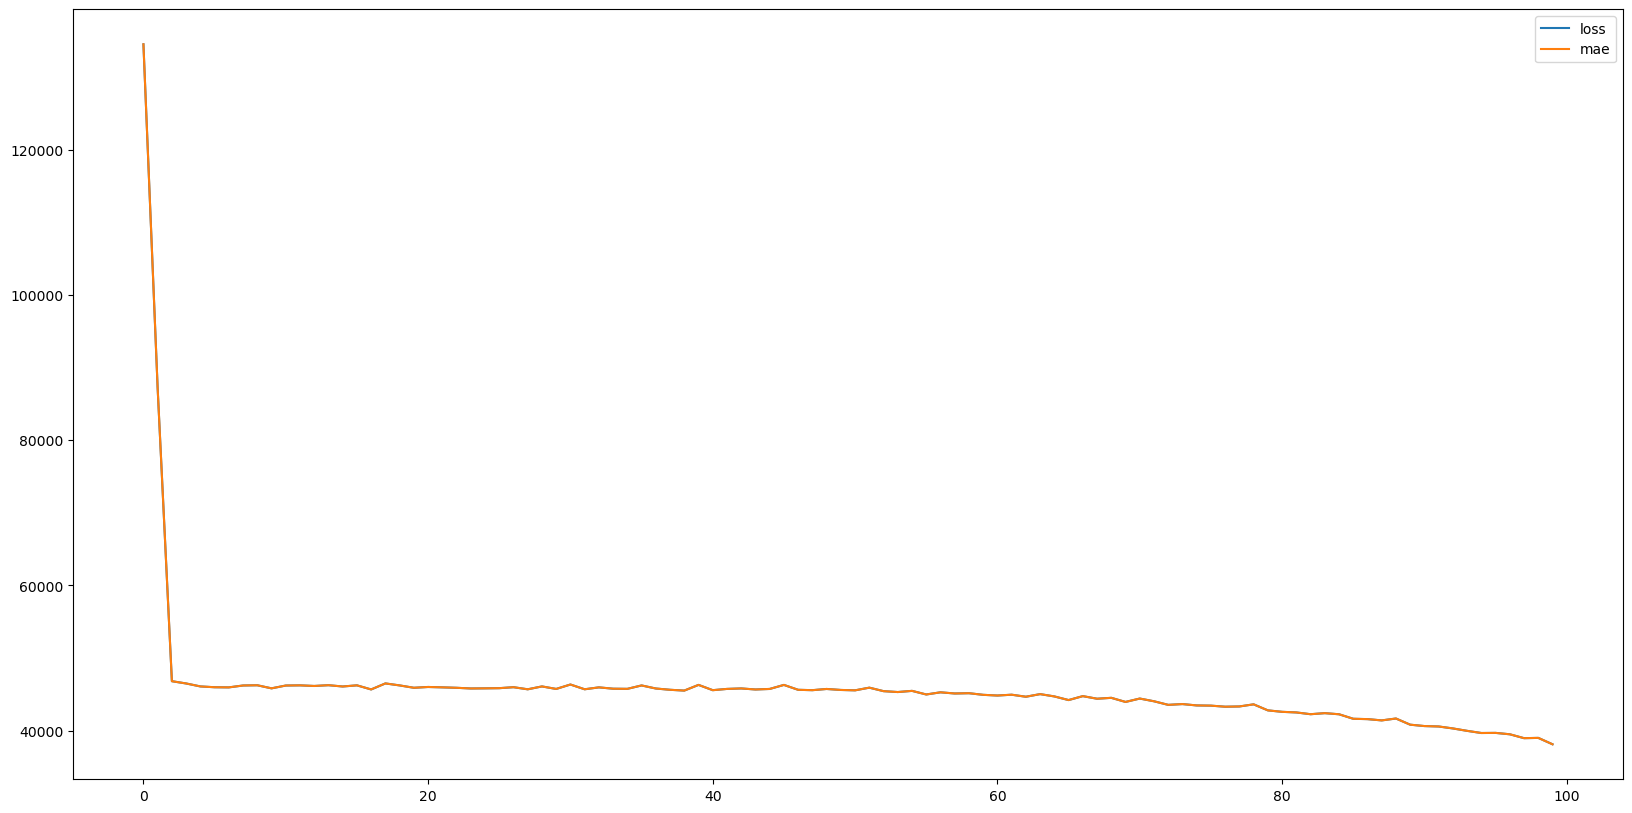

In [24]:
# Plot loss curves
pd.DataFrame(history.history).plot(figsize=(20,10))

In [25]:
prediction = model.predict(X_test)

In [26]:
prediction = np.ravel(prediction)

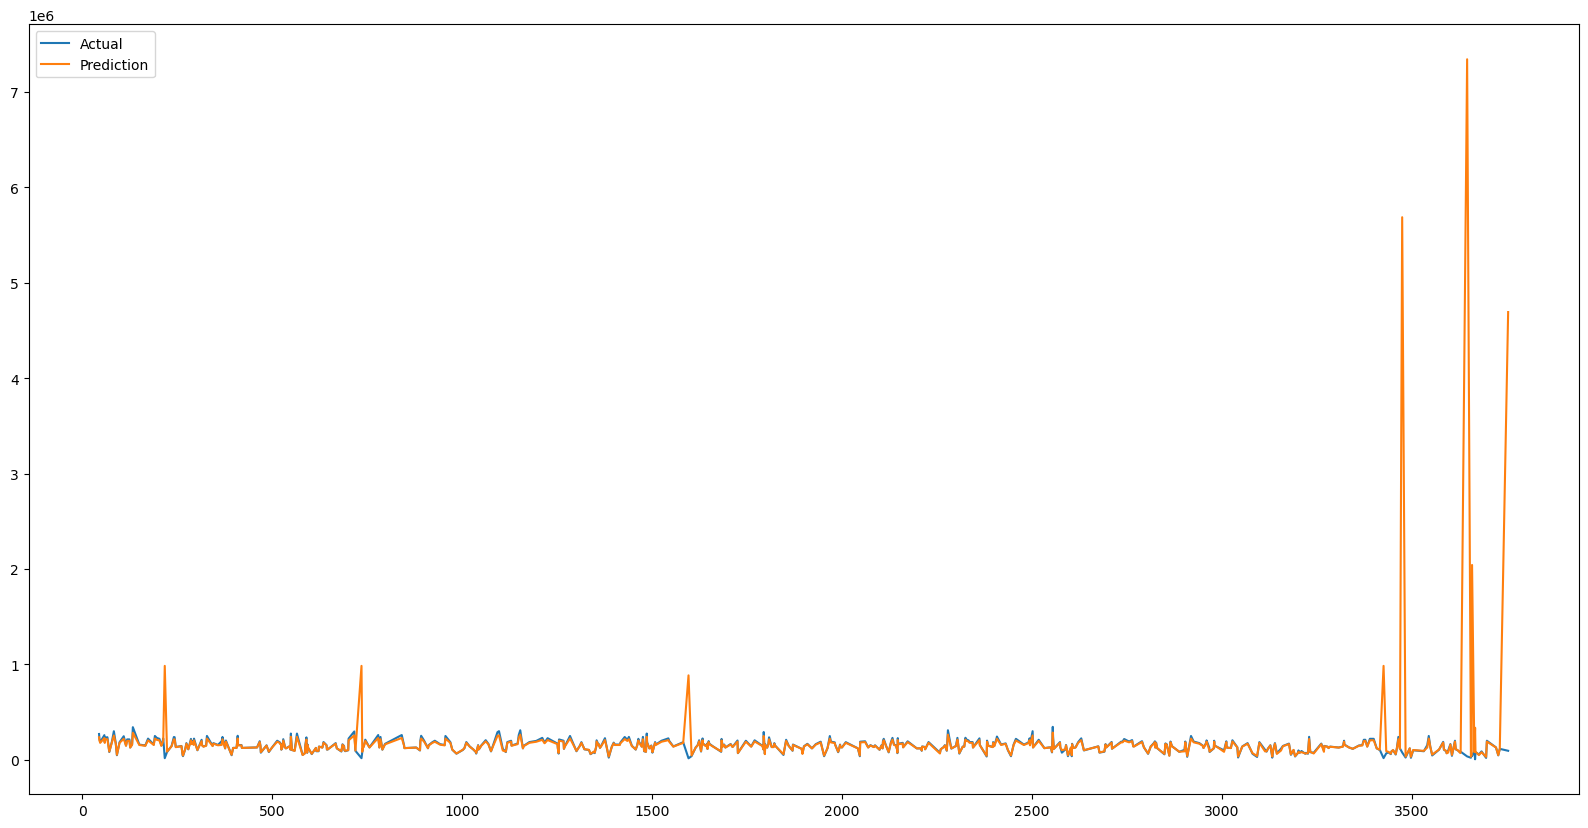

In [28]:
# Prepare data for plot
df_final = pd.DataFrame({"Y_test": y_test , "Prediction" : prediction})

# Sort index before plot
df_final = df_final.sort_index()

# Plot the final result
plt.figure(figsize= (20,10))
plt.plot(df_final)
plt.legend(["Actual" , "Prediction"])